# Notebook Plan

1. Import modules
2. Define configuration
3. Read data from `.csv` file
4. Show snippets from the dataset
5. Describe the dataset (size, features, background)
6. Fix data types
7. Clean the data by removing outliers
8. Plot some graphs for important features
9. State hypothesis and how I came up to them
10. Outline experiment setup
11. Conduct the experiment
12. Check whether the hypothesis is satisfied
13. Repeat steps [9-12]

### Importing necessary modules

In [32]:
import os
import json
import ast

import pandas as pd
import numpy as np

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
pd.set_option('display.max_columns', None)

### Configuration

In [8]:
class cfg:
    data_path_csv = 'data/games.csv'
    data_path_json = 'data/games.json'

### Reading data

In [9]:
df = pd.read_csv(cfg.data_path_csv)

In [10]:
df.describe()

,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000,44.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000
mean,1.355681e+06,134.872930,0.312774,7.193703,0.543412,3.348366,0.039822,9.585609e+02,159.772570,98.909091,19.859394,7.755176e+02,104.729681,10.680105,93.316029,11.467328
std,6.949952e+05,5403.548851,2.254721,12.362478,13.721223,15.421471,1.791013,2.435920e+04,4574.583903,0.857747,171.446874,1.789338e+04,1142.447517,188.840006,1510.732101,205.372944
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.723900e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.331540e+06,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,7.000000e+00,2.000000,99.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.918415e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.500000e+01,14.000000,100.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.765800e+06,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


In [11]:
df.sample(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
83001,2072090,Tax Evasion,"Sep 18, 2023",0 - 20000,0,0,7.99,0,Invade the IRS to get back what is rightfully ...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,NoxBoxMain@Gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,NoxBox,NoxBox,Single-player,"Action,Casual,Indie",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
24566,1027520,Hentai Waifu Vol.1,"Feb 21, 2019",0 - 20000,0,0,1.99,2,Hentai Waifu is a Casual Ecchi / Hentai Clicke...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",“WTH ARE YOU DOING?!” 10/10 – Someone “A Littl...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://patreon.com/eroteam,http://patreon.com/eroteam,hello.rxiii@gmail.com,True,False,False,0,NaN,0,0,0,NaN,87,0,This Game may contain content not appropriate ...,0,0,0,0,Ero Team Triangle,Ero Team Triangle,"Single-player,Steam Achievements,Partial Contr...","Casual,RPG,Simulation",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
79552,2518550,Triplets Trouble!!!,"Oct 6, 2023",0 - 0,0,0,0.00,0,Being a single parent is hard. Being a single ...,"['English', 'Portuguese - Brazil']","['English', 'Portuguese - Brazil']",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,contato@cryingstargames.com.br,True,False,True,0,NaN,0,0,0,NaN,17,0,NaN,0,0,0,0,Crying Star Games,Crying Star Games,Single-player,"Casual,Indie,Free to Play",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
64140,2133040,荆轲新传（重制版）,"Oct 1, 2022",0 - 20000,0,0,3.49,0,I wonder if you still remember the time when y...,['Simplified Chinese'],['Simplified Chinese'],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://space.bilibili.com/40613479,https://space.bilibili.com/40613479,29065683@qq.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,艾露比工作室,艾露比工作室,Single-player,"Adventure,Casual,RPG",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
36569,1510040,Swingy boy,"Feb 9, 2021",0 - 20000,0,0,5.99,0,The only method of controlling the character i...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,chowmaterials@gmail.com,True,False,False,0,NaN,0,4,1,NaN,0,0,NaN,0,0,0,0,Krzysztof Malczuk,ChowMaterials,Single-player,"Adventure,Casual,Indie","Adventure,Casual,Arcade,Character Action Game,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


### Features

In [13]:
df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

### Fixing data types

In [14]:
df.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements                    int64
Recommendati

In [54]:
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

df['Release date'] = pd.to_datetime(df['Release date'], format='mixed')
df['Supported languages'] = df['Supported languages'].apply(safe_literal_eval)
df['Full audio languages'] = df['Full audio languages'].apply(safe_literal_eval)
df['Genres'] = df['Genres'].str.split(',')
df['Tags'] = df['Tags'].str.split(',')

### Main

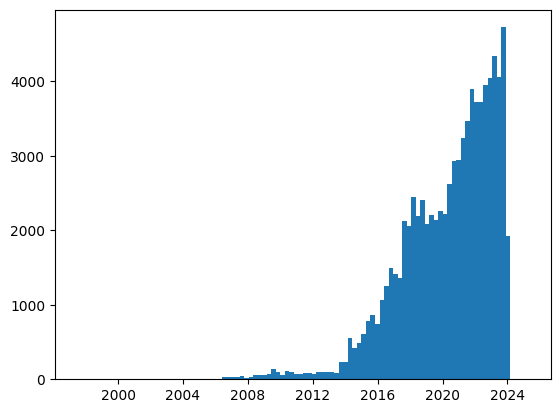

In [16]:
plt.hist(df['Release date'], bins=100)

plt.show()

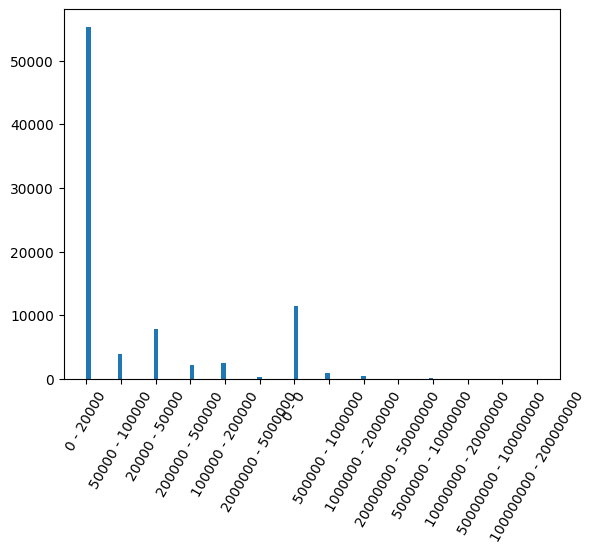

In [17]:
plt.hist(df['Estimated owners'], bins=100)
plt.xticks(rotation=60)
plt.show()

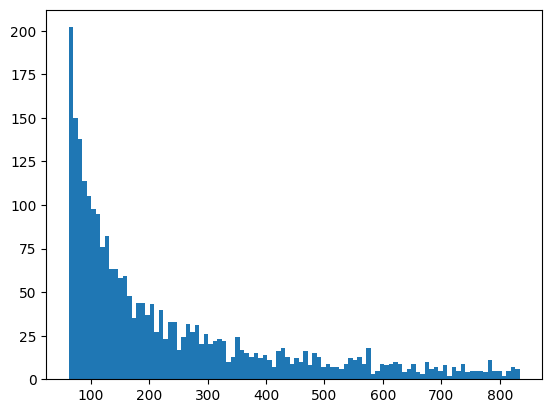

In [18]:
lower_bound = df['Peak CCU'].quantile(0.96)
upper_bound = df['Peak CCU'].quantile(0.99)

plt.hist(df[(df['Peak CCU'] >= lower_bound) & (df['Peak CCU'] <= upper_bound)]['Peak CCU'], bins=100)

plt.show()

In [19]:
df['Required age'].max()

21

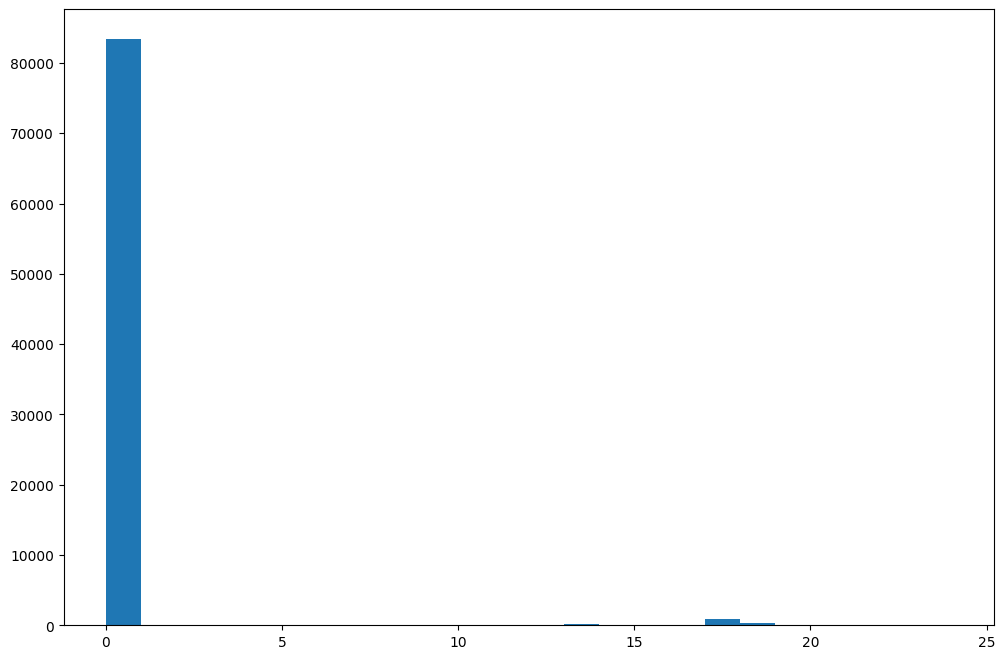

In [20]:
plt.figure(figsize=(12, 8))
plt.hist(df['Required age'], bins=list(range(0, 25)))
plt.show()

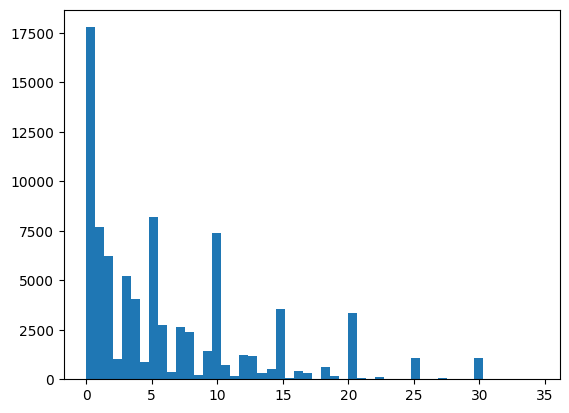

In [21]:
lower_bound = df['Price'].quantile(0)
upper_bound = df['Price'].quantile(0.98)

plt.hist(df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]['Price'], bins=50)

plt.show()

In [22]:
df['DLC count'].sort_values()

0           0
55713       0
55712       0
55710       0
55709       0
         ... 
44976     678
6690      678
7575     1555
23291    1968
32933    2366
Name: DLC count, Length: 85103, dtype: int64

In [23]:
df.loc[32933]

AppID                                                                   1196310
Name                                                      Fantasy Grounds Unity
Release date                                                2020-11-05 00:00:00
Estimated owners                                                  20000 - 50000
Peak CCU                                                                    145
Required age                                                                  0
Price                                                                     39.99
DLC count                                                                  2366
About the game                Prep Less. Play Better. Fantasy Grounds is kno...
Supported languages                                                 ['English']
Full audio languages                                                         []
Reviews                                                                     NaN
Header image                  https://cd

I've found this game on Steam and it seems like this game legitly has more than 2000 dlcs.

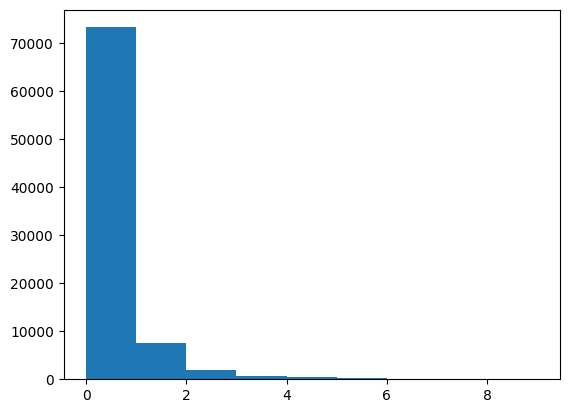

In [24]:
lower_bound = df['DLC count'].quantile(0)
upper_bound = df['DLC count'].quantile(0.99)

plt.hist(df[(df['DLC count'] >= lower_bound) & (df['DLC count'] <= upper_bound)]['DLC count'], bins=range(0, 10))

plt.show()

In [25]:
df['About the game']

0        Galactic Bowling is an exaggerated and stylize...
1        THE LAW!! Looks to be a showdown atop a train....
2        Jolt Project: The army now has a new robotics ...
3        HENOSIS™ is a mysterious 2D Platform Puzzler w...
4        ABOUT THE GAME Play as a hacker who has arrang...
                               ...                        
85098    Marshal Mannerheim’s Saloon Car is the train c...
85099    Beer Run is an Indie game created to steal bee...
85100    A small 'horror' narrative game about isolatio...
85101    Path of Survivors is a multi-class auto-battle...
85102    Meet Mariah, Maria, and Missy a group of colle...
Name: About the game, Length: 85103, dtype: object

In [31]:
for sublist in df['Supported languages']:
    print(type(sublist))
    print(ast.literal_eval(sublist))
    for lang in ast.literal_eval(sublist):
        print(lang)
        break
    break

<class 'str'>
['English']
English


In [57]:
all_languages = [lang for sublist in df['Supported languages'] for lang in sublist]

text = ' '.join(all_languages)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.